<a href="https://colab.research.google.com/github/sooonsyk/Pocari/blob/main/img_preprocessing/yolo_image_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16605, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16605 (delta 50), reused 97 (delta 48), pack-reused 16459
Receiving objects: 100% (16605/16605), 15.27 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (11356/11356), done.


In [3]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylin

In [1]:
%cat /content/yolov5/data/crop_data.yaml

train: /content/drive/MyDrive/YOLO_crop_0601/images/train  # train images (relative to 'path') 4 images
val: /content/drive/MyDrive/YOLO_crop_0601/images/val      # val images (relative to 'path') 4 images
test: /content/drive/MyDrive/YOLO_crop_0601/images/test  # test images (optional)

# Classes

nc : 1
names: ['poo']

In [2]:
!python /content/yolov5/train.py --epochs 50 --data /content/yolov5/data/crop_data.yaml --name yolo_crop

2024-06-09 12:29:30.640074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 12:29:30.640127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 12:29:30.641569: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5/yolov5s.pt, cfg=, data=/content/yolov5/data/crop_data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, devi

In [4]:
!python /content/yolov5/detect.py --source /content/drive/MyDrive/YOLO_crop_0601/images/test --weights /content/yolov5/runs/train/yolo_crop/weights/best.pt

detect: weights=['/content/yolov5/runs/train/yolo_crop/weights/best.pt'], source=/content/drive/MyDrive/YOLO_crop_0601/images/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/drive/MyDrive/YOLO_crop_0601/images/test/blood_1.png: 640x480 1 poo, 57.7ms
image 2/8 /content/drive/MyDrive/YOLO_crop_0601/images/test/diarrhea_3.png: 448x640 1 poo, 53.1ms
image 3/8 /content/drive/MyD

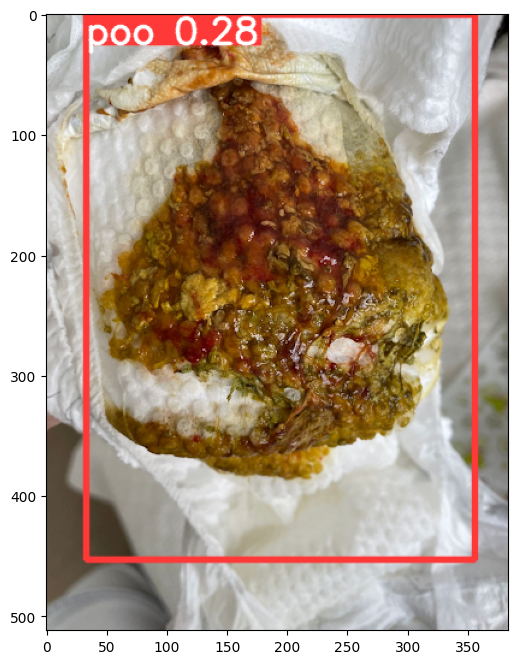

In [5]:
from skimage import io
import matplotlib.pyplot as plt

img_dir = '/content/yolov5/runs/detect/exp/blood_1.png'
image = io.imread(img_dir)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

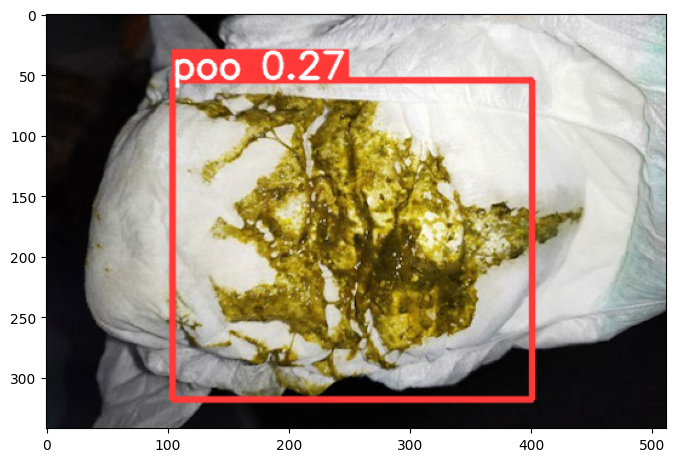

In [6]:
img_dir = '/content/yolov5/runs/detect/exp/diarrhea_3.png'
image = io.imread(img_dir)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()